<a href="https://colab.research.google.com/github/saraibare/4.-Extraccion-de-caracteristicas/blob/main/Act_4_Extracci%C3%B3n_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install funpymodeling #!pip

In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 
from google.colab import files
d = files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab.xlsx


In [ ]:
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


## **Valores nulos**

In [ ]:
Micro_RetailerY = Micro_Retailer.select_dtypes(include='number')
Micro_RetailerY.isnull().sum()

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     3
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                         60
4_number_permanent_employees_last_year                76
103_number_own_fridges                               144
145_number_direct_competitors                         68
24_burnout                                           133
271_card_fee                                         171
272_card_days_receive_money                          127
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                    147
36_credit_default_rate                               157
315_frequency_topups           

In [ ]:
Micro_RetailerY = Micro_RetailerY.drop(['271_card_fee','273_platform_extra_charge',
                                        '274_platform_fee','275_platform_days_receive_money', 
                                        '315_frequency_topups','316_frequency_utility_bills',
                                        '78_number_home_deliveries_week'], axis = 1)

In [ ]:
Micro_RetailerY=Micro_RetailerY.fillna(round(Micro_RetailerY.median(),1))
Micro_RetailerY.isnull().sum()

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
272_card_days_receive_money                          0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
317_home_deliveries                                  0
62_frequency_only_services                           0
172_supplier_frequency                               0
163_number_high_perishable_products                  0
236_whatsapp                                         0
dtype: int

In [ ]:
Micro_RetailerX = Micro_Retailer.select_dtypes(include='object')
Micro_RetailerX = Micro_RetailerX.fillna('Sin datos') 
Micro_RetailerX.isnull().sum()

_record_id                                        0
_title                                            0
_server_updated_at                                0
_updated_by                                       0
_geometry                                         0
                                                 ..
267_technology_investment_customer_preferences    0
234_willingness_participate_workshop              0
318_shopkeeper_name                               0
319_shopkeepers_last_name                         0
235_email                                         0
Length: 81, dtype: int64

## **Outliers**

<Figure size 1500x800 with 0 Axes>

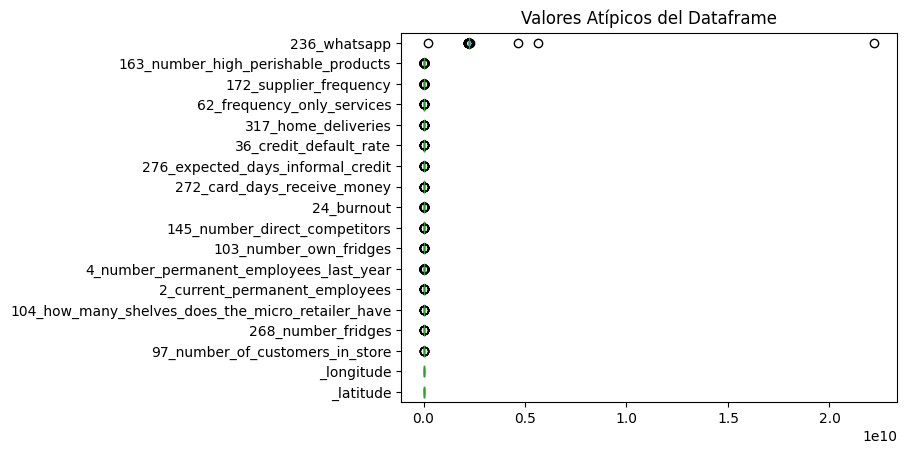

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Micro_RetailerY.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [ ]:
percentile25=Micro_RetailerY.quantile(0.25) #Q1
percentile75=Micro_RetailerY.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

#Obtenemos datos limpios del Dataframe
Micro_RetailerY_iqr= Micro_RetailerY[(Micro_RetailerY<=Limite_Superior_iqr)&(Micro_RetailerY>=Limite_Inferior_iqr)]
Micro_RetailerY_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,317_home_deliveries,62_frequency_only_services,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,NaN,1.0,3.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,NaN,2.224182e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,NaN,2.224182e+09
2,19.058655,-98.232300,0.0,0.0,NaN,2.0,NaN,1.0,0.0,3.5,NaN,NaN,1.0,2.0,2.0,2.0,NaN,2.224182e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,1.0,4.0,3.5,NaN,15.0,1.0,2.0,2.0,2.0,NaN,2.224182e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,NaN,1.0,0.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,NaN,2.224182e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,1.0,2.224182e+09
167,19.042794,-98.193802,1.0,5.0,5.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,1.0,2.224182e+09
168,19.042809,-98.193439,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,1.0,2.224182e+09
169,19.042558,-98.193818,0.0,1.0,1.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,1.0,2.224182e+09


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
Micro_RetailerY_iqr.isnull().sum()

_latitude                                             0
_longitude                                            0
97_number_of_customers_in_store                       5
268_number_fridges                                   10
104_how_many_shelves_does_the_micro_retailer_have     9
2_current_permanent_employees                        15
4_number_permanent_employees_last_year               74
103_number_own_fridges                               21
145_number_direct_competitors                        21
24_burnout                                           38
272_card_days_receive_money                          14
276_expected_days_informal_credit                    17
36_credit_default_rate                               11
317_home_deliveries                                  13
62_frequency_only_services                           20
172_supplier_frequency                               54
163_number_high_perishable_products                  74
236_whatsapp                                    

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
Micro_RetailerY_iqr = Micro_RetailerY_iqr.fillna(round(Micro_RetailerY_iqr.mean(),1))
Micro_RetailerY_iqr.isnull().sum()

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
272_card_days_receive_money                          0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
317_home_deliveries                                  0
62_frequency_only_services                           0
172_supplier_frequency                               0
163_number_high_perishable_products                  0
236_whatsapp                                         0
dtype: int

In [ ]:
# Unimos
Micro_RetailerXY = pd.concat([Micro_RetailerX,Micro_RetailerY], axis=1)
Micro_RetailerXY.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,317_home_deliveries,62_frequency_only_services,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,3.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,0.0,2.224182e+09
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,4.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,60.0,2.224182e+09
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,0.0,3.5,0.0,10.0,1.0,2.0,2.0,2.0,60.0,2.224182e+09
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,4.0,3.5,0.0,15.0,1.0,2.0,2.0,2.0,0.0,2.224182e+09
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,0.0,3.5,1.0,15.0,1.0,2.0,2.0,2.0,0.0,2.224182e+09


## **Análisis univariado**

In [ ]:
Micro_Retailer20 = Micro_RetailerX[['232_type_of_store','184_store_devices',
                                    '5_change_store_space_last_year','18_sales_records',
                                    '49_inventory_records','20_reviews_finances_monthly',
                                    '189_payment_methods','33_credit_to_customers',
                                    '214_customer_relationship_tools', '193_sales_planning_tools',
                                    '60_services','69_why_not_services',
                                    '185_place_orders_suppliers', '157_frequency_organize_shelves',
                                    '158_charact_organize_products_on_shelves','249_technology_training',
                                    '250_technology_investment_operations','251_technology_investment_customers',
                                    '267_technology_investment_customer_preferences','313_home_deliveries',
                                    ]]
Micro_Retailer20.head()

,232_type_of_store,184_store_devices,5_change_store_space_last_year,18_sales_records,49_inventory_records,20_reviews_finances_monthly,189_payment_methods,33_credit_to_customers,214_customer_relationship_tools,193_sales_planning_tools,60_services,69_why_not_services,185_place_orders_suppliers,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,267_technology_investment_customer_preferences,313_home_deliveries
0,Tailor,POS system (i.e. computer + bar code scanner +...,No cambió,Software especializado + computadora,Software especializado + computadora,yes,"Efectivo,Transferencia interbancaria",no,Redes sociales,Software especializado,Sin datos,Sin datos,Sin datos,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Sin datos,Sin datos,Sin datos,Sin datos,Sin datos
1,Grocery store (aka. nanostore),Dataphone (i.e. card payments),Aumentó 15%,No lo hago,No lo hago,yes,"Efectivo,Transferencia interbancaria",no,Aplicación móvil,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,"Categoría (e.g. limpieza, aseo personal, comes...",Sin datos,Sin datos,Sin datos,Sin datos,Sin datos
2,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",No cambió,Software especializado + computadora,En Excel,yes,"Efectivo,Tarjeta de débito y/o crédito",yes,Redes sociales,Sin datos,Sin datos,Sin datos,Sin datos,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Sin datos,Sin datos,Sin datos,Sin datos,Sin datos
3,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,No cambió,Software especializado + computadora,Software especializado + computadora,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",no,Teléfono,Ninguna,Sin datos,Sin datos,Sin datos,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Sin datos,Sin datos,Sin datos,Sin datos,Sin datos
4,Grocery store (aka. nanostore),Smartphone,No cambió,En papel,En papel,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",yes,Sin datos,Sin datos,Sin datos,Sin datos,Sin datos,Mensualmente,Venta cruzada (e.g. cereal + leche),Sin datos,Sin datos,Sin datos,Sin datos,Sin datos


### **232_type_of_store**

In [ ]:
table1= freq_tbl(Micro_Retailer20['232_type_of_store'])
table1= table1[table1['frequency']>1]
table1= table1.set_index('232_type_of_store')
table1

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


<Axes: ylabel='frequency'>

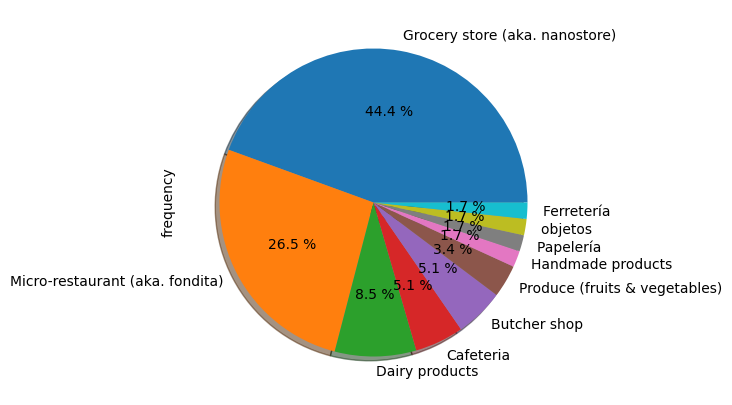

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table1["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

### **184_store_devices**

In [ ]:
table2= freq_tbl(Micro_Retailer20['184_store_devices'])
table2= table2[table2['frequency']>2]
table2= table2.set_index('184_store_devices')
table2 = table2[['frequency']]
table2

,frequency
184_store_devices,
Smartphone,52
Analog cash register,16
POS system (i.e. computer + bar code scanner + printer),9
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9
"Analog cash register,Smartphone",8
"Security cameras,Smartphone",7
"Dataphone (i.e. card payments),Security cameras,Smartphone",5
Security cameras,5
"POS system (i.e. computer + bar code scanner + printer),Security cameras,Smartphone",4


Text(0, 0.5, 'Frecuencia')

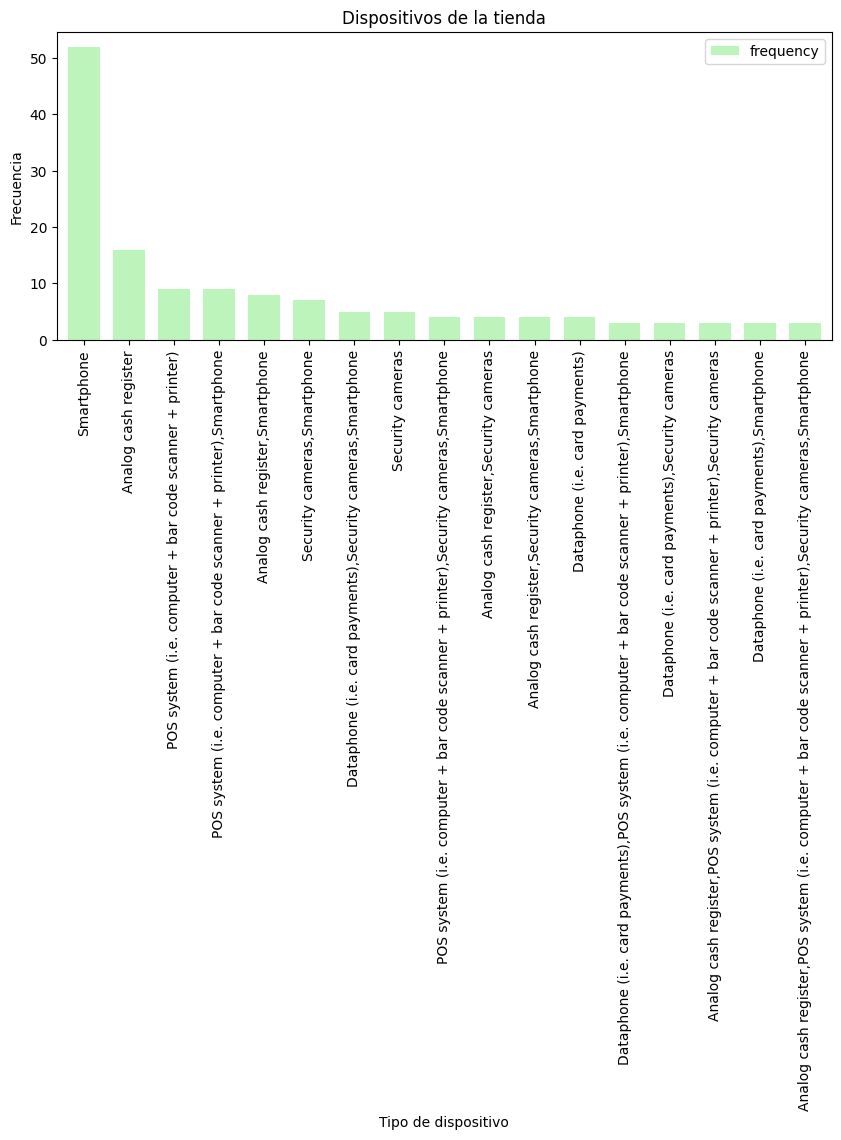

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table2.plot(kind = 'bar', color='lightgreen', alpha=0.6, width=0.7, figsize=(10,4))
plt.title('Dispositivos de la tienda')
plt.xlabel('Tipo de dispositivo')
plt.ylabel('Frecuencia')

### **5_change_store_space_last_year**

In [ ]:
table3= freq_tbl(Micro_Retailer20['5_change_store_space_last_year'])
table3 = table3[table3['frequency']>1]
table3 = table3.drop(1, axis = 0)
table3 = table3.set_index('5_change_store_space_last_year')
table3

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,72,0.421053,0.421053
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673
Aumentó 15%,4,0.023392,0.959064
Aumentó 50% o más,4,0.023392,0.982456
Disminuyó 25%,2,0.011696,0.994152


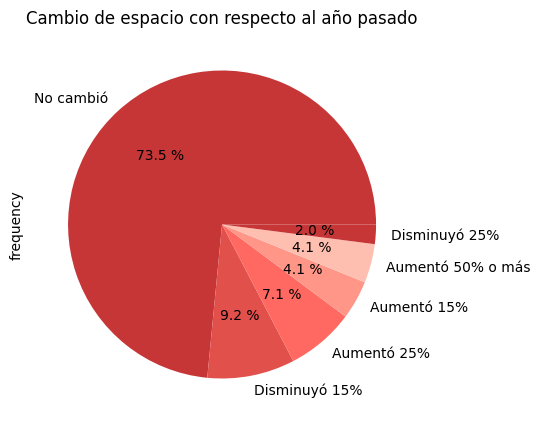

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table3["frequency"].plot(kind='pie', figsize=(10,5), shadow=False, autopct="%0.1f %%", colors = ['#c63637','#e2504c','#ff6961','#ff9688','#ffbfb0'])
plt.title('Cambio de espacio con respecto al año pasado')
plt.show()

### **18_sales_records**

In [ ]:
table4 = freq_tbl(Micro_Retailer20['18_sales_records'])
table4 = table4[table4['frequency']>2]
table4 = table4.set_index('18_sales_records')
table4 = table4[['frequency']]
table4 = table4.drop(['Sin datos'], axis = 0)
table4

,frequency
18_sales_records,
En papel,47
Software especializado + computadora,22
No lo hago,14
En Excel,10
Caja registradora (análoga),4
"En Excel,En papel",4


Text(0, 0.5, 'Frecuencia')

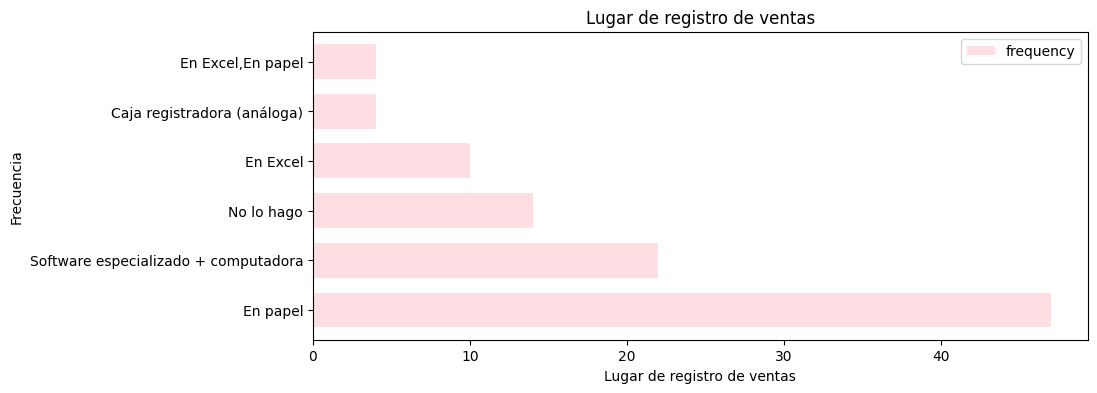

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table4.plot(kind = 'barh', color='pink', alpha=0.5, width=0.7, figsize=(10,4))
plt.title('Lugar de registro de ventas')
plt.xlabel('Lugar de registro de ventas')
plt.ylabel('Frecuencia')

### **49_inventory_records**

In [ ]:
table5 = freq_tbl(Micro_Retailer20['49_inventory_records'])
table5 = table5[table5['frequency']>2]
table5 = table5.set_index('49_inventory_records')
table5 = table5.drop(['Sin datos'], axis = 0)
table5

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


Text(0, 0.5, 'Frecuencia')

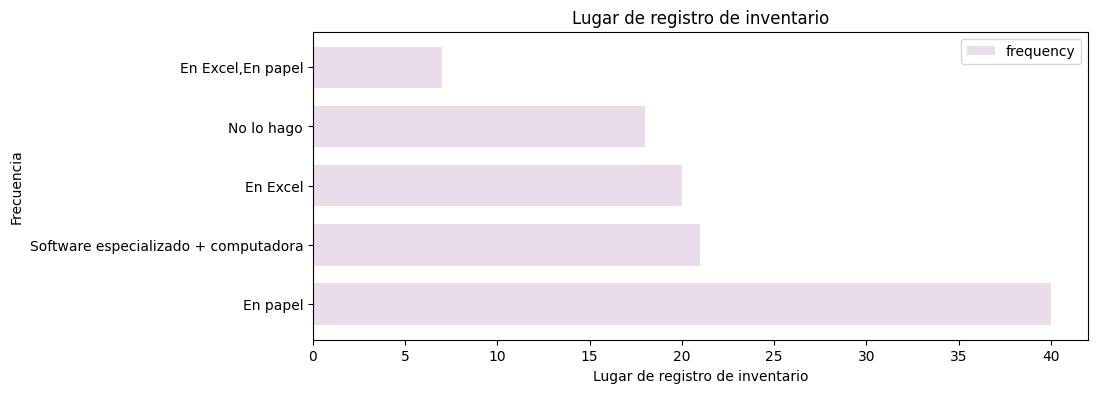

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table5 = table5[['frequency']]
table5.plot(kind = 'barh', color='#c0a0c3', alpha = 0.35, width=0.7, figsize=(10,4))
plt.title('Lugar de registro de inventario')
plt.xlabel('Lugar de registro de inventario')
plt.ylabel('Frecuencia')

### **20_reviews_finances_monthly**

In [ ]:
table6 = freq_tbl(Micro_Retailer20['20_reviews_finances_monthly'])
table6 = table6[table6['frequency']>2]
table6 = table6.set_index('20_reviews_finances_monthly')
#table6 = table6[['frequency']]
table6 = table6.drop(['Sin datos'], axis = 0)
table6

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,79,0.461988,0.461988
no,29,0.169591,1.000000


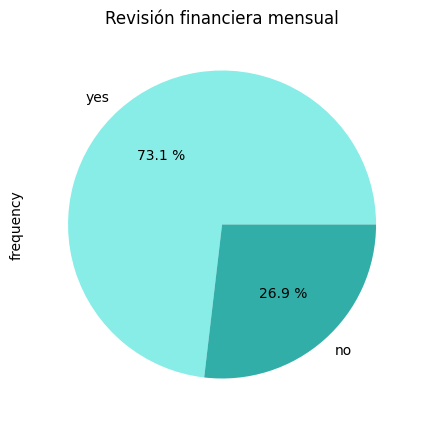

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table6["frequency"].plot(kind='pie', figsize=(10,5), shadow=False, autopct="%0.1f %%", colors = ['#88ECE7','#31AEA8'])
plt.title('Revisión financiera mensual')
plt.show()

### **189_payment_methods**

In [ ]:
table7 = freq_tbl(Micro_Retailer20['189_payment_methods'])
table7 = table7[table7['frequency']>2]
table7 = table7.set_index('189_payment_methods')
table7 = table7[['frequency']]
#table7 = table6.drop(['Sin datos'], axis = 0)
table7

,frequency
189_payment_methods,
Sin datos,64
Efectivo,40
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30
"Efectivo,Tarjeta de débito y/o crédito",19
"Efectivo,Transferencia interbancaria",15


Text(0, 0.5, 'Frecuencia')

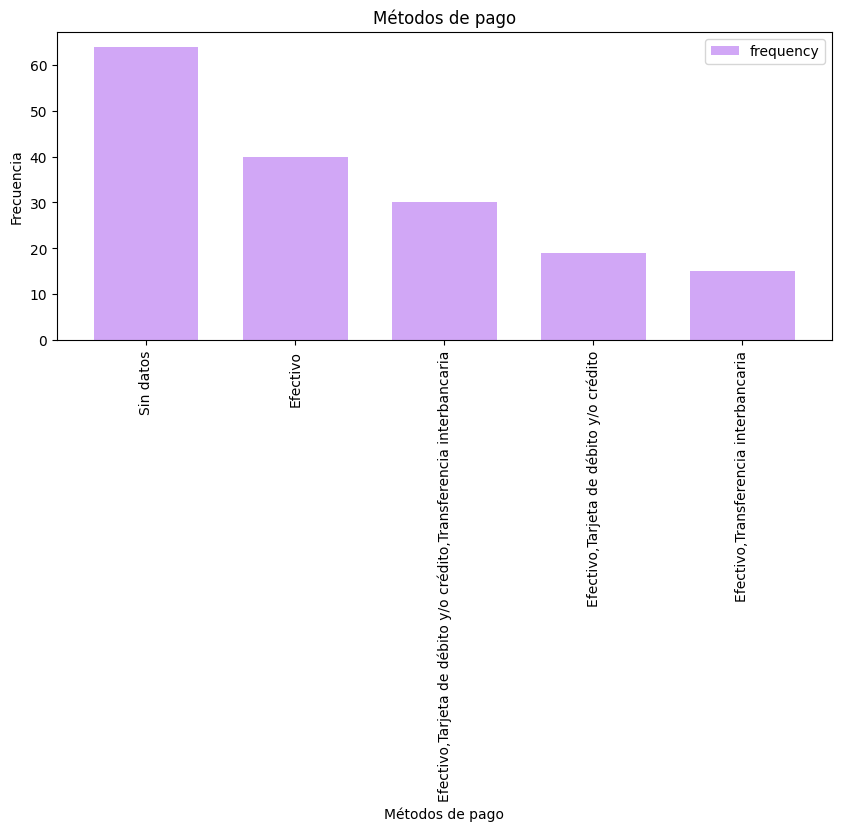

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table7.plot(kind = 'bar', color='#D1A7F6', width=0.7, figsize=(10,4))
plt.title('Métodos de pago')
plt.xlabel('Métodos de pago')
plt.ylabel('Frecuencia')

### **33_credit_to_customers**

In [ ]:
table8 = freq_tbl(Micro_Retailer20['33_credit_to_customers'])
table8 = table8[table8['frequency']>2]
table8 = table8.set_index('33_credit_to_customers')
#table8 = table8[['frequency']]
table8 = table8.drop(['Sin datos'], axis = 0)
table8

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,80,0.467836,0.467836
yes,27,0.157895,1.000000


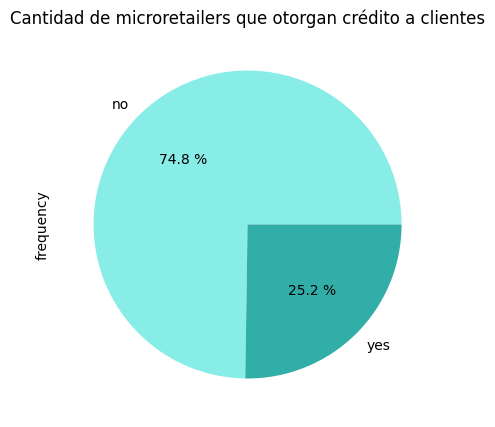

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table8["frequency"].plot(kind='pie', figsize=(10,5), shadow=False, autopct="%0.1f %%", colors = ['#88ECE7','#31AEA8'])
plt.title('Cantidad de microretailers que otorgan crédito a clientes')
plt.show()

### **214_customer_relationship_tools**

In [ ]:
table9 = freq_tbl(Micro_Retailer20['214_customer_relationship_tools'])
table9 = table9[table9['frequency']>2]
table9 = table9.set_index('214_customer_relationship_tools')
table9 = table9[['frequency']]
table9 = table9.drop(['Sin datos'], axis = 0)
table9

,frequency
214_customer_relationship_tools,
Redes sociales,27
Aplicación móvil,21
Ninguna,20
"Aplicación móvil,Redes sociales",13
Cuaderno,6


Text(0, 0.5, 'Frecuencia')

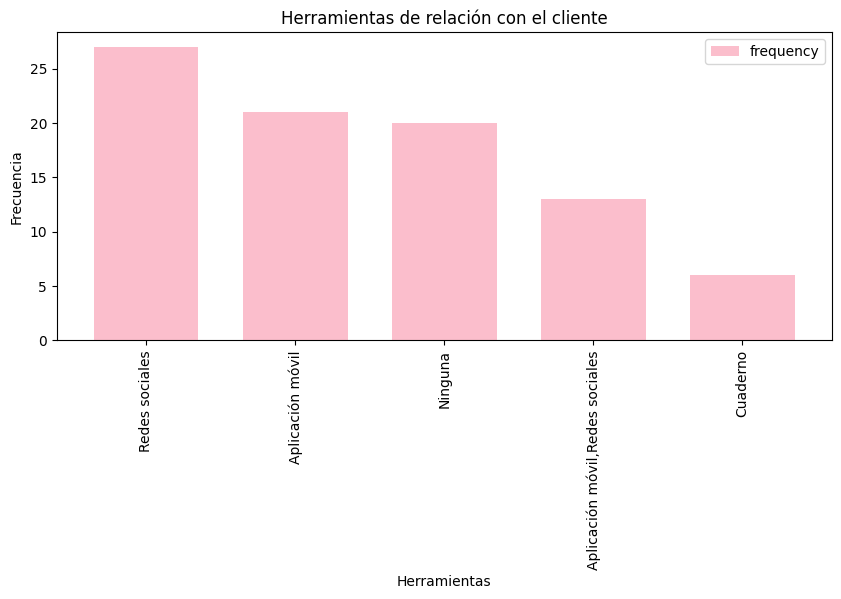

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table9.plot(kind = 'bar', color='#FBBECC', width=0.7, figsize=(10,4))
plt.title('Herramientas de relación con el cliente')
plt.xlabel('Herramientas')
plt.ylabel('Frecuencia')

### **193_sales_planning_tools**

In [ ]:
table10 = freq_tbl(Micro_Retailer20['193_sales_planning_tools'])
table10 = table10[table10['frequency']>2]
table10 = table10.set_index('193_sales_planning_tools')
table10 = table10[['frequency']]
table10 = table10.drop(['Sin datos'], axis = 0)
table10

,frequency
193_sales_planning_tools,
Ninguna,33
Cuaderno,21
Software especializado,6
Excel,6
"Cuaderno,Excel",3


Text(0, 0.5, 'Frecuencia')

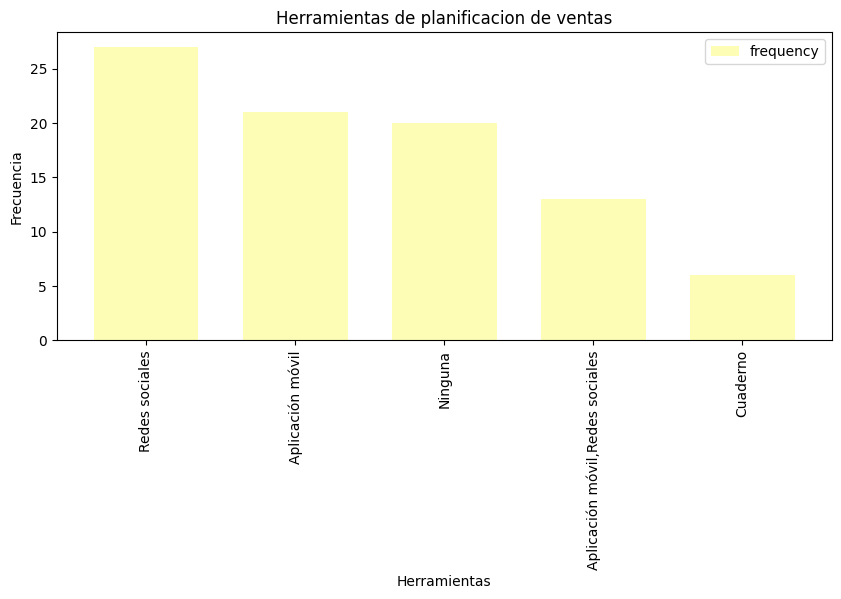

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table9.plot(kind = 'bar', color='#FDFDB5', width=0.7, figsize=(10,4))
plt.title('Herramientas de planificacion de ventas')
plt.xlabel('Herramientas')
plt.ylabel('Frecuencia')

### **60_services**

In [ ]:
table11 = freq_tbl(Micro_Retailer20['60_services'])
table11 = table11[table11['frequency']>2]
table11 = table11.set_index('60_services')
#table11 = table11[['frequency']]
table11 = table11.drop(['Sin datos'], axis = 0)
table11

,frequency,percentage,cumulative_perc
60_services,,,
Ninguno,44,0.257310,0.807018
Entrega a domicilio,15,0.087719,0.894737
Recarga telefónica,7,0.040936,0.935673


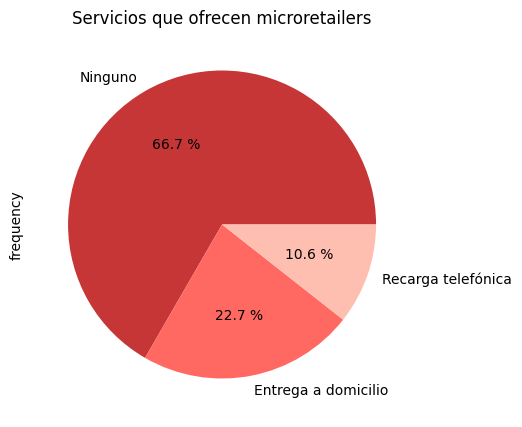

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table11["frequency"].plot(kind='pie', figsize=(10,5), shadow=False, autopct="%0.1f %%", colors = ['#c63637','#ff6961','#ffbfb0'])
plt.title('Servicios que ofrecen microretailers')
plt.show()

### **69_why_not_services**

In [ ]:
table12 = freq_tbl(Micro_Retailer20['69_why_not_services'])
table12 = table12[table12['frequency']>2]
table12 = table12.set_index('69_why_not_services')
table12 = table12.drop(['Sin datos'], axis = 0)
table12

,frequency,percentage,cumulative_perc
69_why_not_services,,,
No quiero involucrarme con la tecnología,7,0.040936,0.801170
No conozco los servicios,7,0.040936,0.842105
No creo que represente grandes ingresos,6,0.035088,0.877193
Es muy caro,4,0.023392,0.900585


Text(0, 0.5, 'Frecuencia')

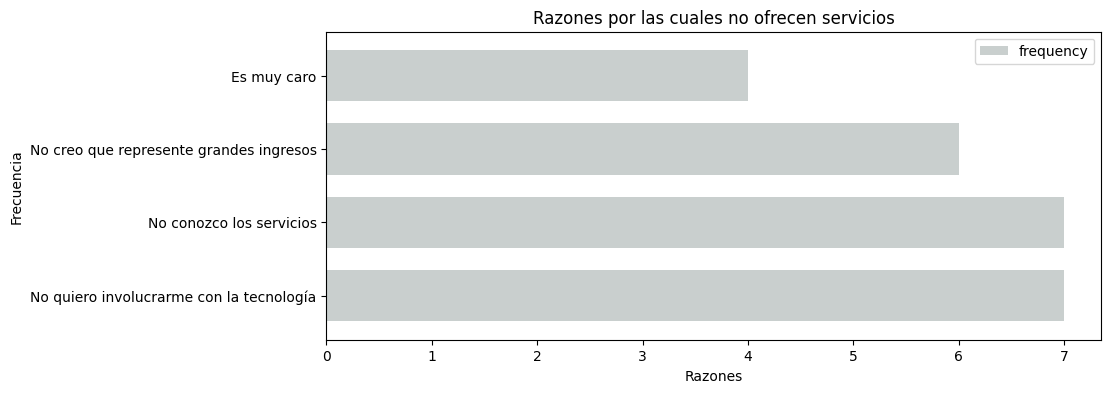

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table12 = table12[['frequency']]
table12.plot(kind = 'barh', color='#C9CFCE', width=0.7, figsize=(10,4))
plt.title('Razones por las cuales no ofrecen servicios')
plt.xlabel('Razones')
plt.ylabel('Frecuencia')

### **185_place_orders_suppliers**

In [ ]:
table13 = freq_tbl(Micro_Retailer20['185_place_orders_suppliers'])
table13 = table13[table13['frequency']>2]
table13 = table13.set_index('185_place_orders_suppliers')
table13 = table13.drop(['Sin datos'], axis = 0)
table13

,frequency,percentage,cumulative_perc
185_place_orders_suppliers,,,
En persona,20,0.116959,0.701754
Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.748538
"En persona,Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)",7,0.040936,0.789474
Llamada telefónica,6,0.035088,0.824561
"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.853801
Página web del proveedor,5,0.029240,0.883041
"En persona,Llamada telefónica",5,0.029240,0.912281


Text(0, 0.5, 'Frecuencia')

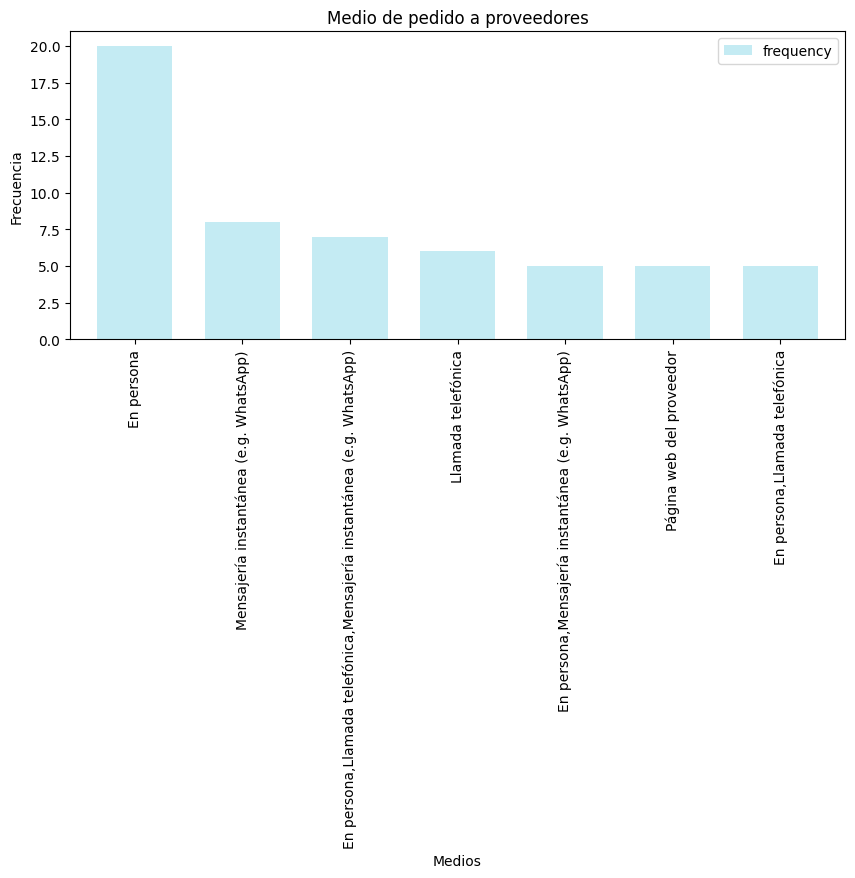

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table13 = table13[['frequency']]
table13.plot(kind = 'bar', color='#C4EBF3', width=0.7, figsize=(10,4))
plt.title('Medio de pedido a proveedores')
plt.xlabel('Medios')
plt.ylabel('Frecuencia')

### **157_frequency_organize_shelves**

In [ ]:
table14 = freq_tbl(Micro_Retailer20['157_frequency_organize_shelves'])
table14 = table14[table14['frequency']>2]
table14 = table14.set_index('157_frequency_organize_shelves')
table14 = table14.drop(['Sin datos'], axis = 0)
table14

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368
Quincenalmente,5,0.029240,0.976608


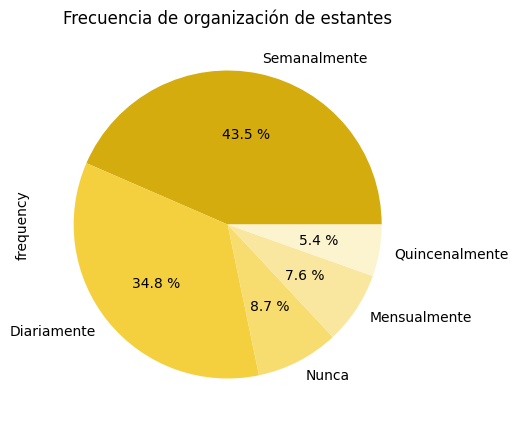

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table14["frequency"].plot(kind='pie', figsize=(10,5), shadow=False, autopct="%0.1f %%", colors = ['#D4AC0D','#F4D03F','#F7DC6F','#F9E79F','#FCF3CF'])
plt.title('Frecuencia de organización de estantes')
plt.show()

### **158_charact_organize_products_on_shelves**

In [ ]:
table15 = freq_tbl(Micro_Retailer20['158_charact_organize_products_on_shelves'])
table15 = table15[table15['frequency']>2]
table15 = table15.set_index('158_charact_organize_products_on_shelves')
table15 = table15.drop(['Sin datos'], axis = 0)
table15

,frequency,percentage,cumulative_perc
158_charact_organize_products_on_shelves,,,
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",29,0.169591,0.631579
Frecuencia de venta,15,0.087719,0.719298
Tamaño,9,0.052632,0.771930
Margen de utilidad,8,0.046784,0.818713
Precio,6,0.035088,0.853801
Refrigeración,4,0.023392,0.877193
"Frecuencia de venta,Refrigeración",3,0.017544,0.894737
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.),Refrigeración",3,0.017544,0.912281


Text(0, 0.5, 'Frecuencia')

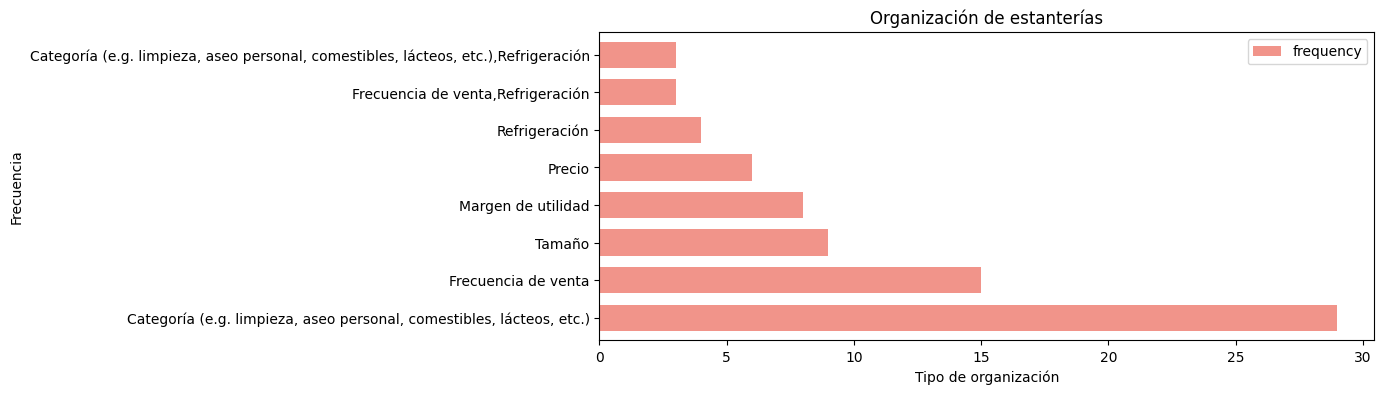

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table15 = table15[['frequency']]
table15.plot(kind = 'barh', color='#F1948A', width=0.7, figsize=(10,4))
plt.title('Organización de estanterías')
plt.xlabel('Tipo de organización')
plt.ylabel('Frecuencia')

### **249_technology_training**

In [ ]:
table16 = freq_tbl(Micro_Retailer20['249_technology_training'])
table16 = table16[table16['frequency']>2]
table16 = table16.set_index('249_technology_training')
table16 = table16.drop(['Sin datos'], axis = 0)
table16

,frequency,percentage,cumulative_perc
249_technology_training,,,
Totalmente de acuerdo,37,0.216374,0.789474
De acuerdo,21,0.122807,0.912281
Totalmente en desacuerdo,8,0.046784,0.959064
Ni de acuerdo ni en desacuerdo,6,0.035088,0.994152


Text(0.5, 0, 'Frecuencia')

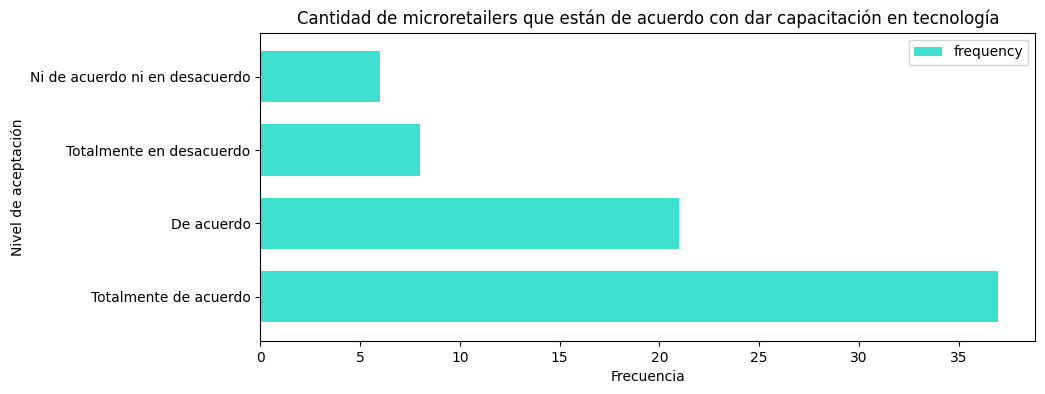

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table16 = table16[['frequency']]
table16.plot(kind = 'barh', color='#40E0D0', width=0.7, figsize=(10,4))
plt.title('Cantidad de microretailers que están de acuerdo con dar capacitación en tecnología')
plt.ylabel('Nivel de aceptación')
plt.xlabel('Frecuencia')

### **250_technology_investment_operations**

In [ ]:
table17 = freq_tbl(Micro_Retailer20['250_technology_investment_operations'])
table17 = table17[table17['frequency']>2]
table17 = table17.set_index('250_technology_investment_operations')
table17 = table17.drop(['Sin datos'], axis = 0)
table17

,frequency,percentage,cumulative_perc
250_technology_investment_operations,,,
Totalmente de acuerdo,34,0.198830,0.766082
De acuerdo,20,0.116959,0.883041
Totalmente en desacuerdo,8,0.046784,0.929825
En desacuerdo,6,0.035088,0.964912
Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


Text(0, 0.5, 'Frecuencia')

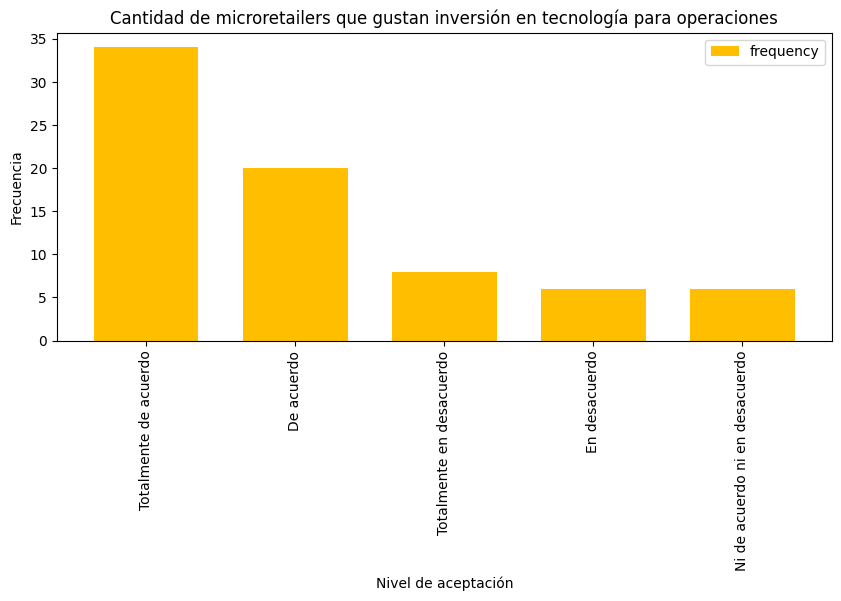

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table17 = table17[['frequency']]
table17.plot(kind = 'bar', color='#FFBF00', width=0.7, figsize=(10,4))
plt.title('Cantidad de microretailers que gustan inversión en tecnología para operaciones')
plt.xlabel('Nivel de aceptación')
plt.ylabel('Frecuencia')

### **251_technology_investment_customers**

In [ ]:
table18 = freq_tbl(Micro_Retailer20['251_technology_investment_customers'])
table18 = table18[table18['frequency']>2]
table18 = table18.set_index('251_technology_investment_customers')
table18 = table18.drop(['Sin datos'], axis = 0)
table18

,frequency,percentage,cumulative_perc
251_technology_investment_customers,,,
Totalmente de acuerdo,35,0.204678,0.777778
De acuerdo,23,0.134503,0.912281
Totalmente en desacuerdo,7,0.040936,0.953216
Ni de acuerdo ni en desacuerdo,5,0.029240,0.982456
En desacuerdo,3,0.017544,1.000000


Text(0, 0.5, 'Frecuencia')

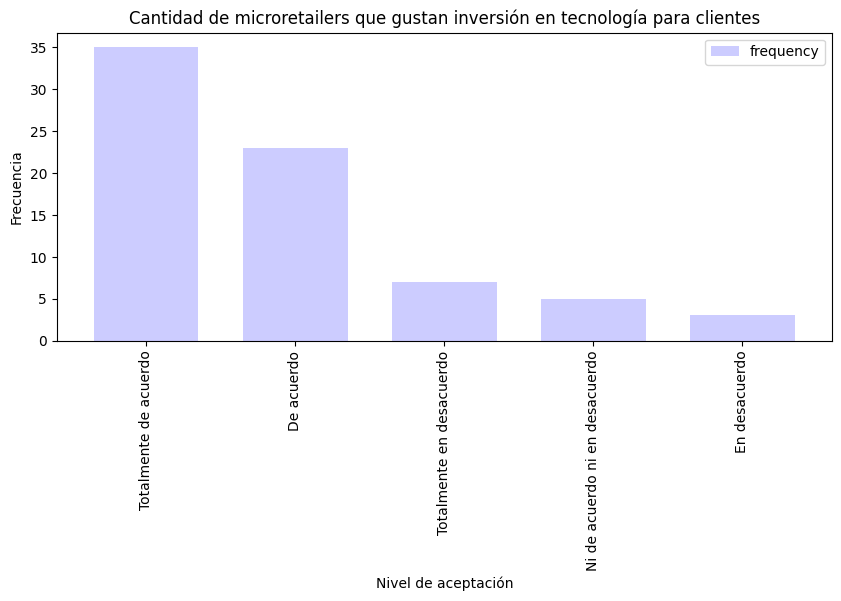

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table18 = table18[['frequency']]
table18.plot(kind = 'bar', color='#CCCCFF', width=0.7, figsize=(10,4))
plt.title('Cantidad de microretailers que gustan inversión en tecnología para clientes')
plt.xlabel('Nivel de aceptación')
plt.ylabel('Frecuencia')

### **267_technology_investment_customer_preferences**

In [ ]:
table19 = freq_tbl(Micro_Retailer20['267_technology_investment_customer_preferences'])
table19 = table19[table19['frequency']>2]
table19 = table19.set_index('267_technology_investment_customer_preferences')
table19 = table19.drop(['Sin datos'], axis = 0)
table19

,frequency,percentage,cumulative_perc
267_technology_investment_customer_preferences,,,
Totalmente de acuerdo,29,0.169591,0.760234
De acuerdo,24,0.140351,0.900585
Totalmente en desacuerdo,13,0.076023,0.976608


Text(0, 0.5, 'Frecuencia')

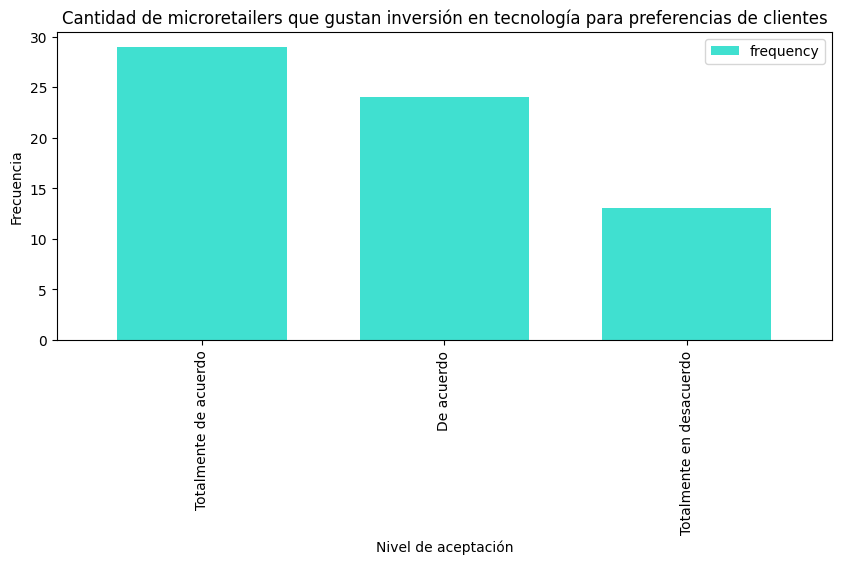

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table19 = table19[['frequency']]
table19.plot(kind = 'bar', color='#40E0D0', width=0.7, figsize=(10,4))
plt.title('Cantidad de microretailers que gustan inversión en tecnología para preferencias de clientes')
plt.xlabel('Nivel de aceptación')
plt.ylabel('Frecuencia')

### **313_home_deliveries**

In [ ]:
table20 = freq_tbl(Micro_Retailer20['313_home_deliveries'])
table20 = table20[table20['frequency']>2]
table20 = table20.set_index('313_home_deliveries')
table20 = table20.drop(['Sin datos'], axis = 0)
table20

,frequency,percentage,cumulative_perc
313_home_deliveries,,,
Totalmente en desacuerdo,25,0.146199,0.807018
Totalmente de acuerdo,14,0.081871,0.888889
Algo de acuerdo,11,0.064327,0.953216
Algo en desacuerdo,5,0.029240,0.982456
Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


Text(0, 0.5, 'Frecuencia')

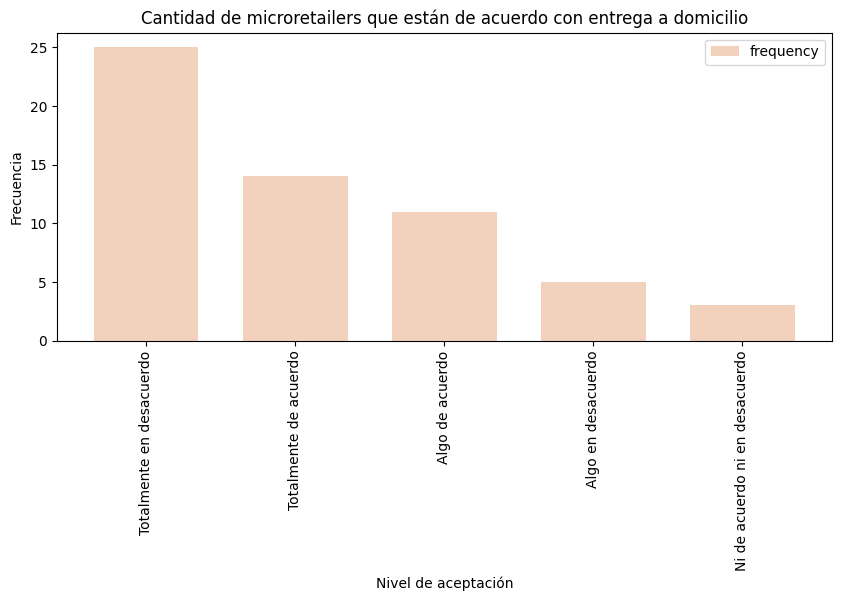

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table20 = table20[['frequency']]
table20.plot(kind = 'bar', color='#F2D2BD', width=0.7, figsize=(10,4))
plt.title('Cantidad de microretailers que están de acuerdo con entrega a domicilio')
plt.xlabel('Nivel de aceptación')
plt.ylabel('Frecuencia')